# The Breast Cancer Wisconsin (Diagnostic) Dataset

With this dataset we can predict whether the cancer is benign or malignant.
The features are computed from a digitized image of a breast mass and they describe a few characteristics of the cell nuclei present in the picture.

## Attributes

There are no missing values in the attributes (described below).

Ten real-valued features are computed for each cell nucleus:



*   radius
*   texture 
*   perimeter
*   area 
*   smoothness 
*   compactness 
*   concavity
*   concave points
*   symmetry
*   fractal dimension

The mean, standard error and worst or largest of these features were computed for each image, resulting in 30 features. 

## Import packages

In this step, we import all the needed libraries

In [63]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score

#with this import we "ignore" the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the breast cancer dataset

In [64]:
#import the dataset
import sklearn.datasets as datasets
from sklearn.datasets import load_breast_cancer

#decide how many decimals we need
pd.set_option("display.precision", 3) 

#load the dataset as a DataFrame
mydata = datasets.load_breast_cancer() 
breast_cancer_data = pd.DataFrame(mydata.data, columns=mydata.feature_names)

#declare our target
y = mydata.target
breast_cancer_data['class']= target=pd.DataFrame(y, columns=['class'])

#show the first 10 instances
breast_cancer_data.head(10) 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,...,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,...,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,...,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,...,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,...,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077,0
5,12.45,15.70,82.57,477.1,0.128,0.170,0.158,0.081,0.209,0.076,...,23.75,103.40,741.6,0.179,0.525,0.535,0.174,0.399,0.124,0
6,18.25,19.98,119.60,1040.0,0.095,0.109,0.113,0.074,0.179,0.057,...,27.66,153.20,1606.0,0.144,0.258,0.378,0.193,0.306,0.084,0
7,13.71,20.83,90.20,577.9,0.119,0.165,0.094,0.060,0.220,0.075,...,28.14,110.60,897.0,0.165,0.368,0.268,0.156,0.320,0.115,0
8,13.00,21.82,87.50,519.8,0.127,0.193,0.186,0.094,0.235,0.074,...,30.73,106.20,739.3,0.170,0.540,0.539,0.206,0.438,0.107,0
9,12.46,24.04,83.97,475.9,0.119,0.240,0.227,0.085,0.203,0.082,...,40.68,97.65,711.4,0.185,1.058,1.105,0.221,0.437,0.207,0


# Problem definition

*The subject of this notebook is to find a model that best fits/describes the data and can predict the likelihood of a breast cancer.*


## Exploratory Analysis

In this step, we explore and summarise the data.

## Declare the dimension of the dataset

In [65]:
a = len(breast_cancer_data)
b = len(breast_cancer_data.columns)

print(f"The dataset has {a} instances and {b-1} Features.")

The dataset has 569 instances and 30 Features.


## Search for Unique / Missing Values and show the type of each attribute

If there are missing values, then we ought to clean the data in order to continue. If the are not any missing values, then we shall continue with the proccess.

In [66]:
#For every column, show the number of the unique values, the missing values and the type for every feature 

#columns of the dataset
colnames = breast_cancer_data.columns

#in a DataFrame
x = pd.DataFrame(columns=["Column","NumOfMissingVal","UniqueVal", "Type"])

#a loop that "fills" x with the information we want to print
for cn in colnames:
  x = x.append({"Column" : cn,"NumOfMissingVal": sum(pd.isna(breast_cancer_data[cn])),
                "UniqueVal":len(breast_cancer_data[cn].unique()),
                "Type" : breast_cancer_data[cn].dtypes},ignore_index=True)

#print x
x

,Column,NumOfMissingVal,UniqueVal,Type
0,mean radius,0,456,float64
1,mean texture,0,479,float64
2,mean perimeter,0,522,float64
3,mean area,0,539,float64
4,mean smoothness,0,474,float64
5,mean compactness,0,537,float64
6,mean concavity,0,537,float64
7,mean concave points,0,542,float64
8,mean symmetry,0,432,float64
9,mean fractal dimension,0,499,float64


# Statistical summary of all attributes

In [67]:
#generate descriptive statistics
breast_cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,0.627
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,0.484
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055,0.000
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071,0.000
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,1.000
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,1.000
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207,1.000


# Univariate plots

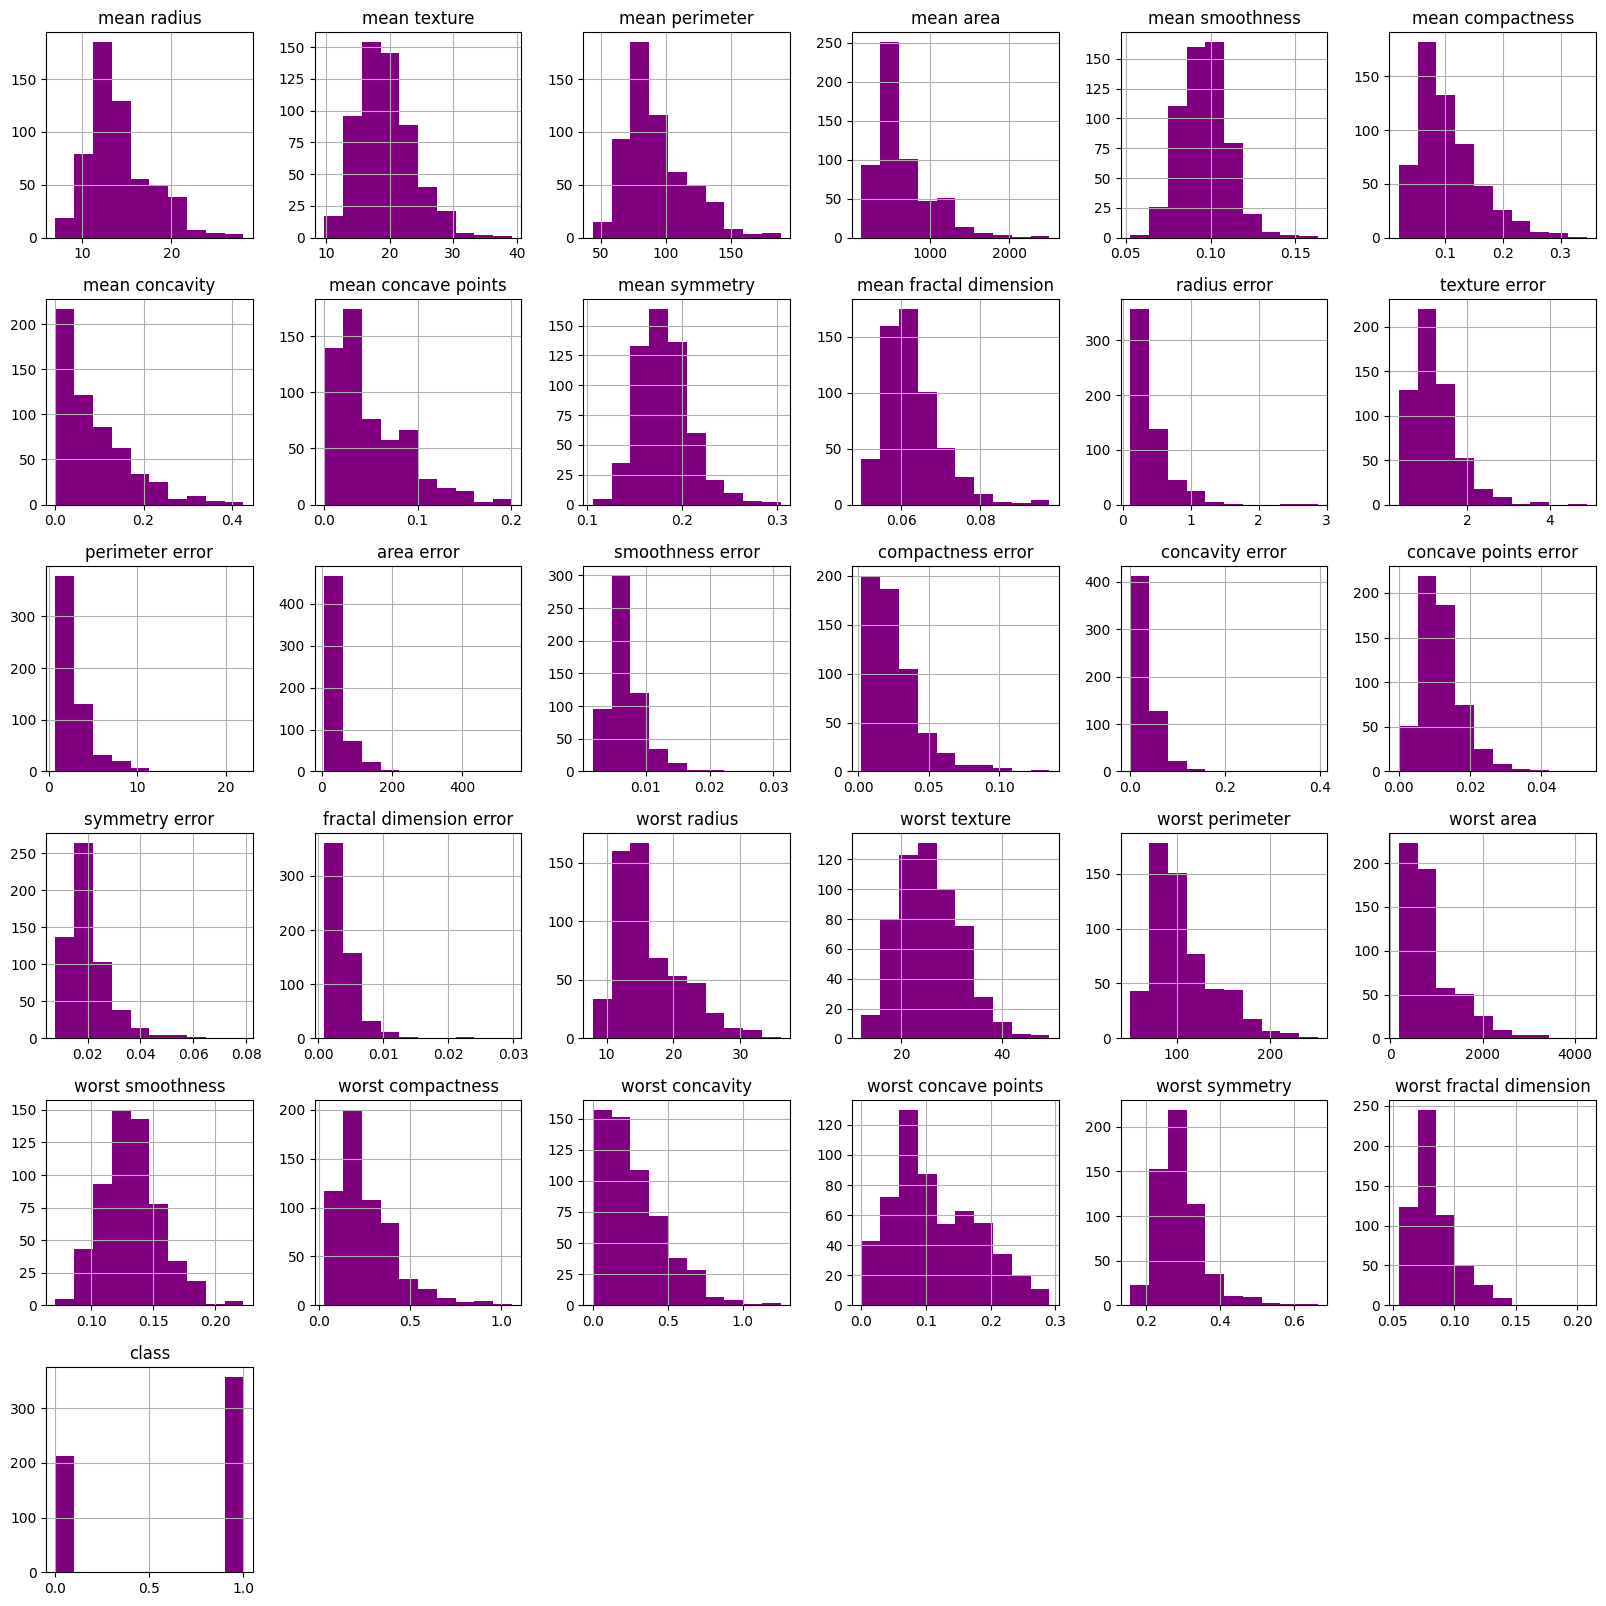

In [68]:
#shows distribution of each feature
h = breast_cancer_data.hist(figsize=(20, 20), color='purple')
plt.show()

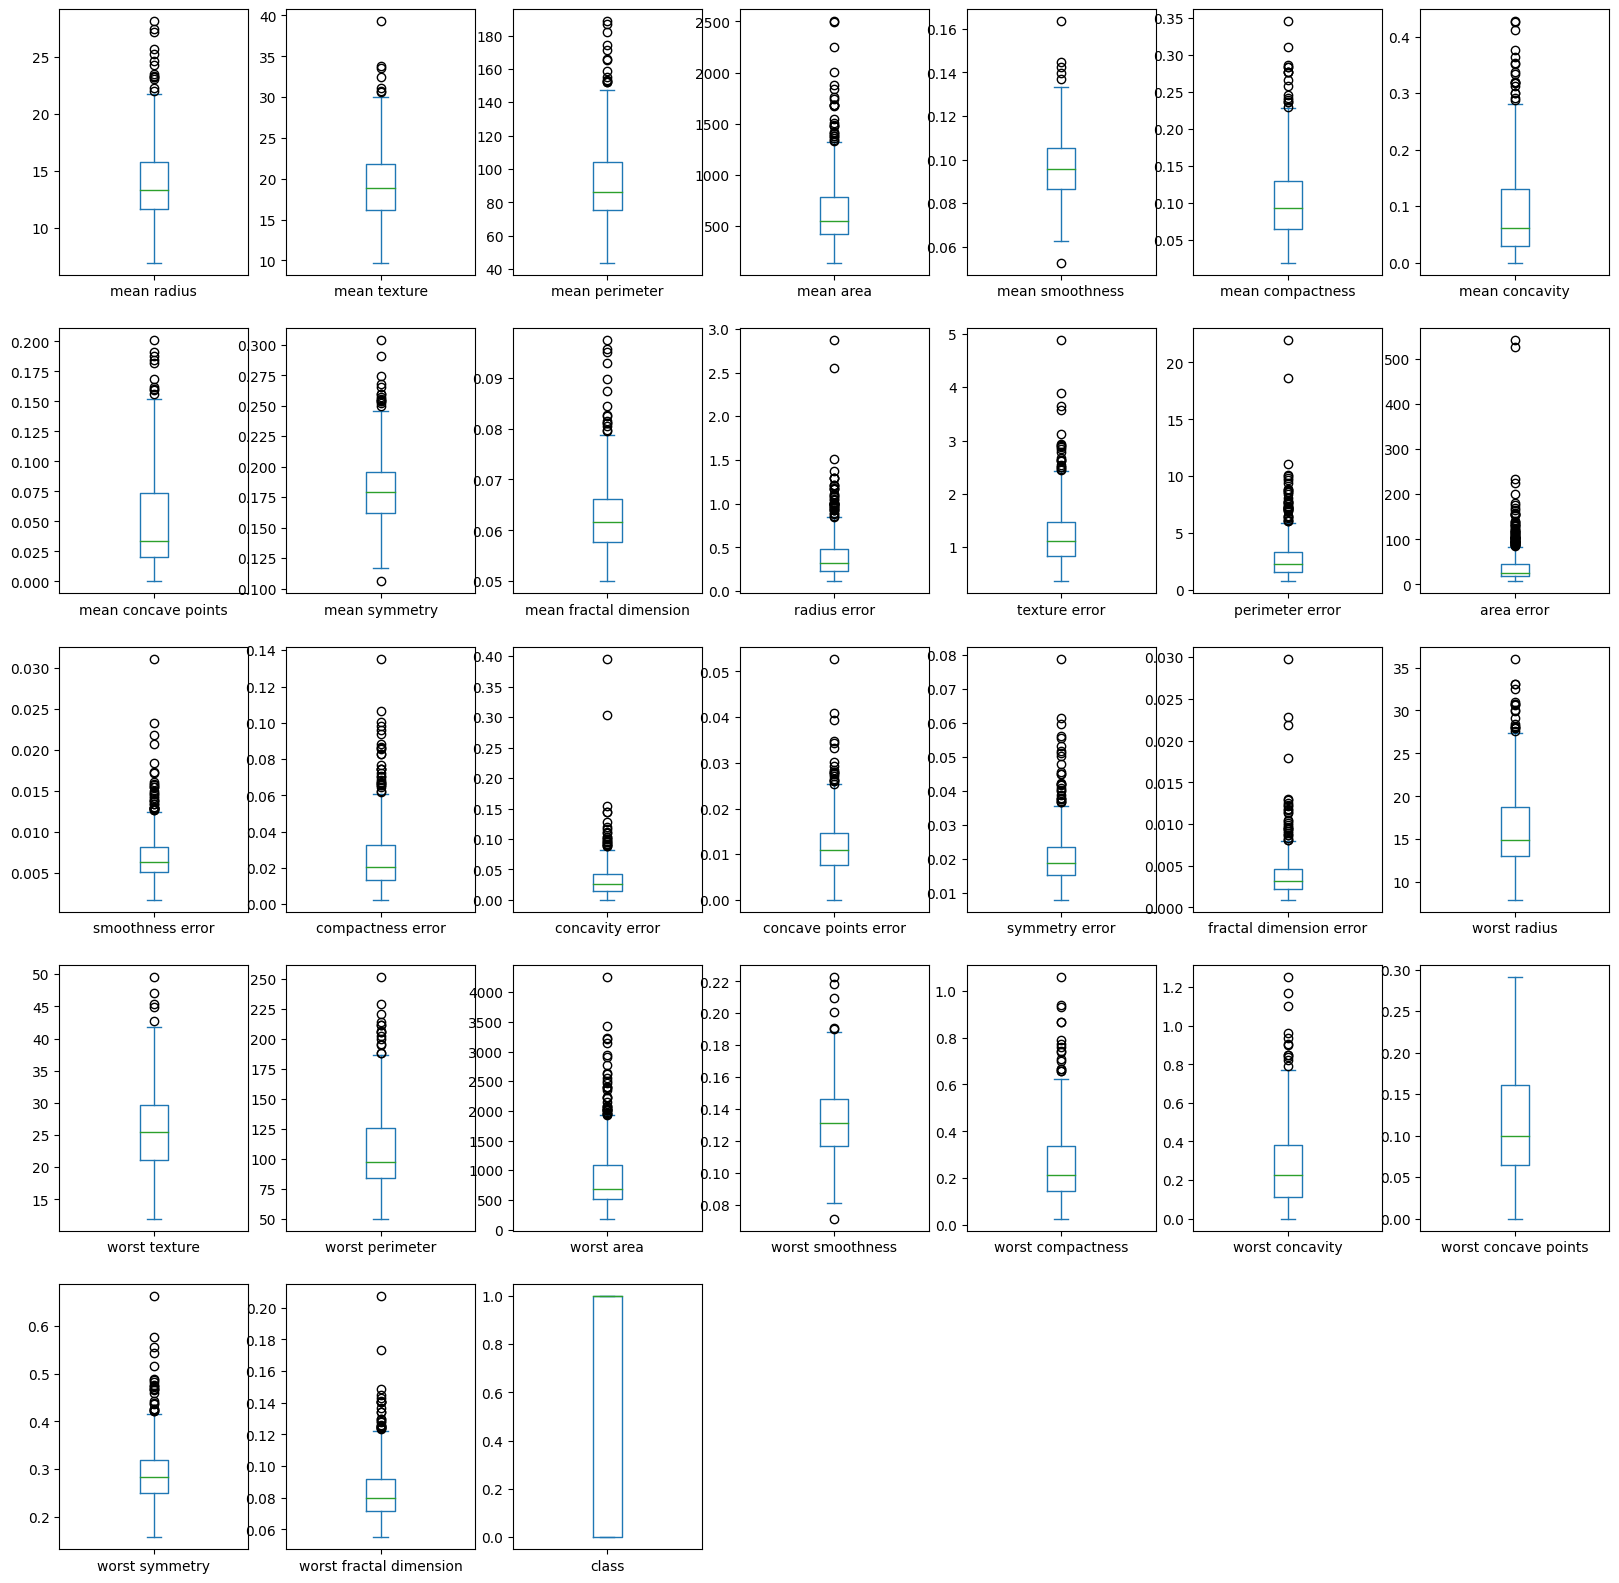

In [69]:
#show the outliers
bp = breast_cancer_data.plot(figsize=(20,20), kind='box', subplots=True, layout=(5,7))
plt.show()

# Correlation between features
It's very common for a dataset to contain features that are highly correlated. High correlated features contribute very less in predicting the output, so we must know these features.

In [70]:
#Pearson method: 0 is no correlation, 1 is total positive correlation, and −1 is total negative correlation. 
breast_cancer_data.corr(method='pearson')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-3.116e-01,...,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007,-0.730
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-7.644e-02,...,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119,-0.415
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-2.615e-01,...,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051,-0.743
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-2.831e-01,...,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004,-0.709
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,5.848e-01,...,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499,-0.359
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,5.654e-01,...,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687,-0.597
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,3.368e-01,...,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515,-0.696
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,1.669e-01,...,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369,-0.777
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,4.799e-01,...,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438,-0.330
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000e+00,...,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767,0.013


# Correlation Matrix

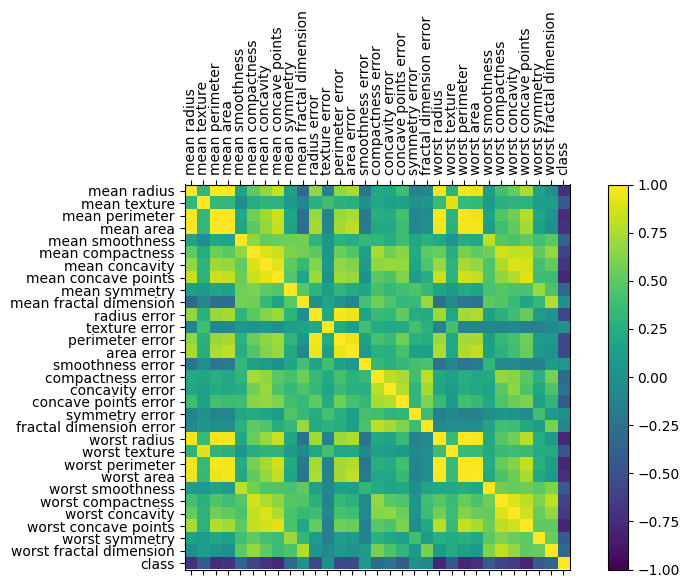

In [71]:
# A correlation of -1 or 1 shows a full negative or total positive correlation respectively. 
correlations = breast_cancer_data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,31,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colnames, rotation=90)
ax.set_yticklabels(colnames)

plt.show()

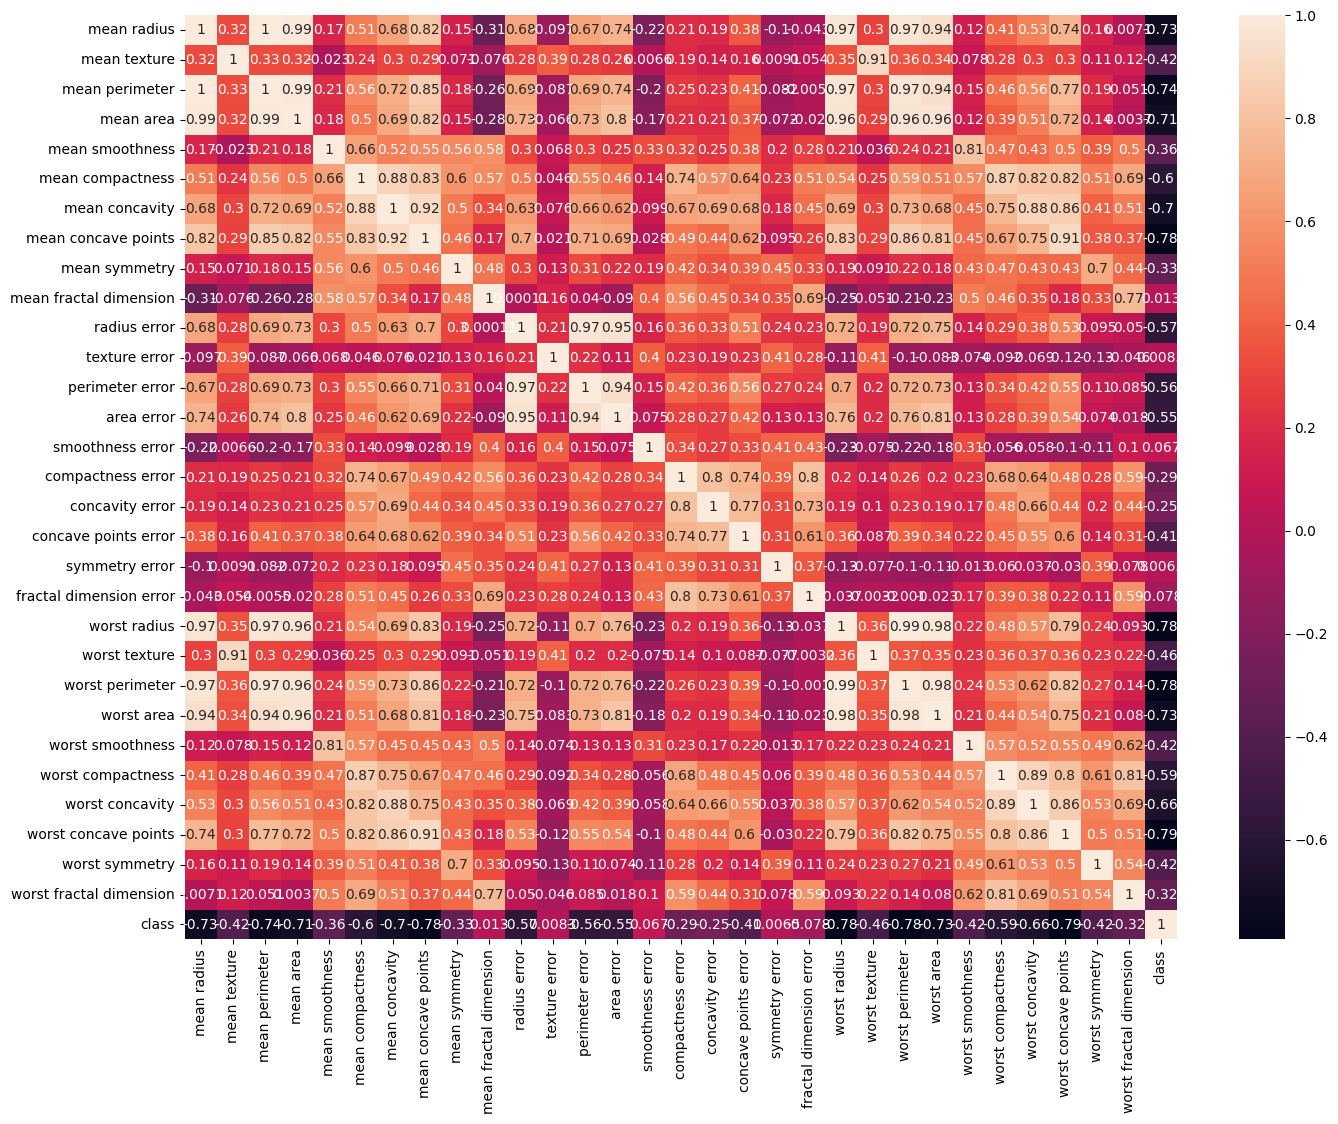

In [72]:
#create a heatmap with the data values for better understanting the correlations
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(correlations, annot=True)
plt.show()

The features are high correlated

# Multivariate plots for the highest correlated values

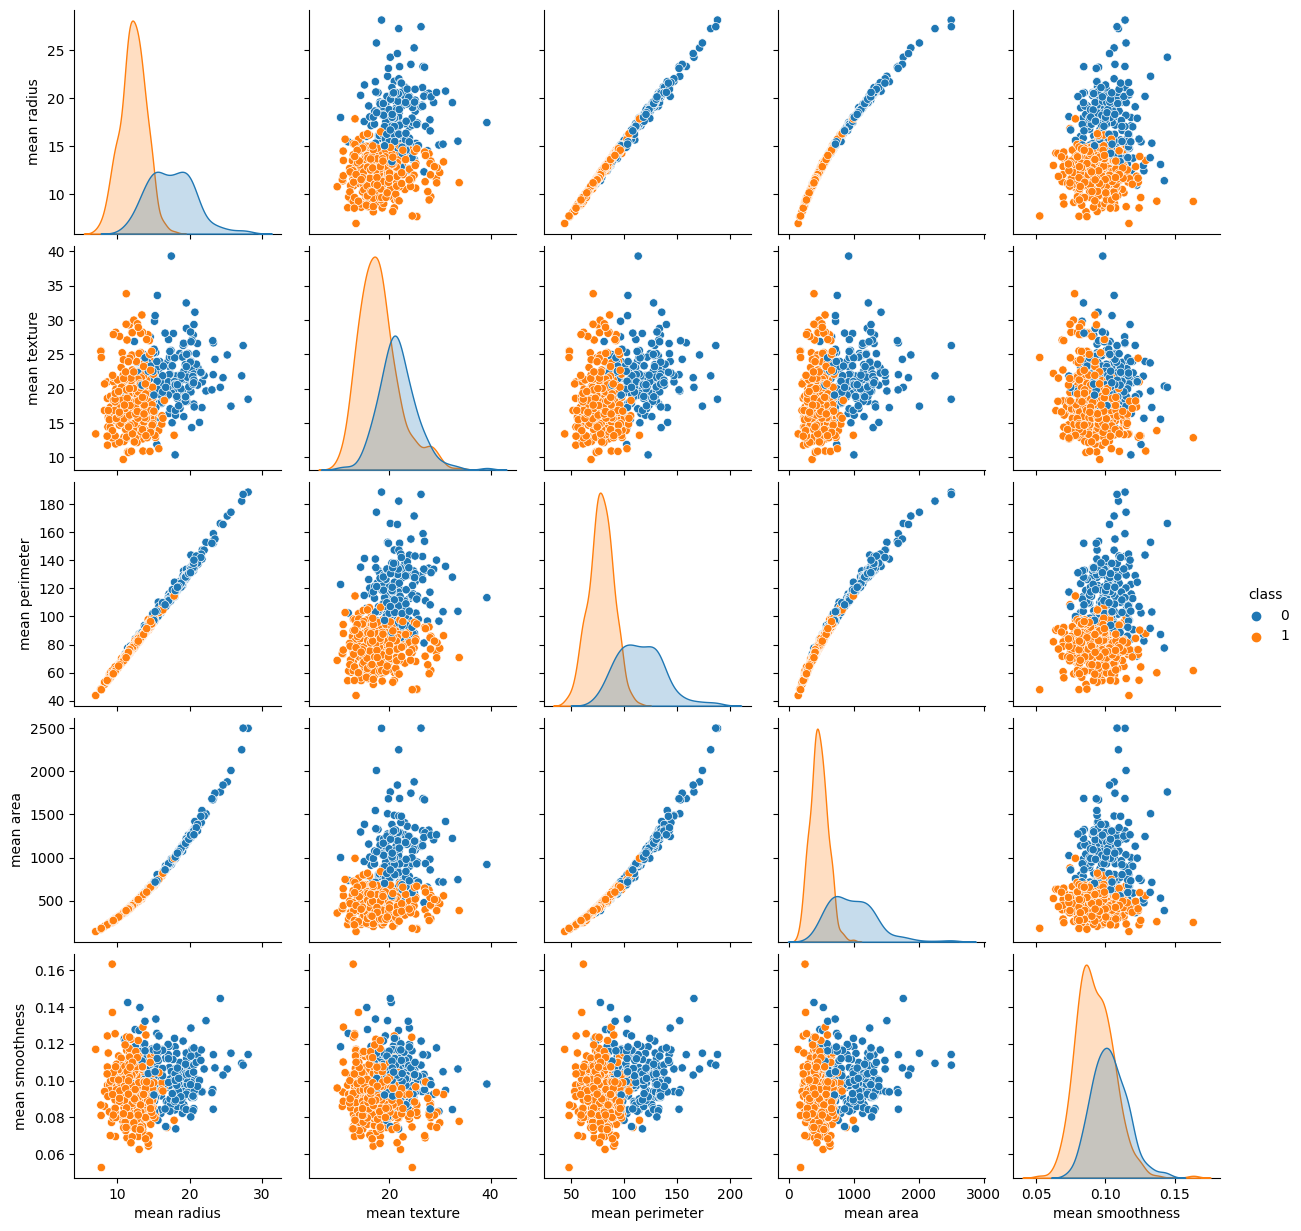

In [73]:
sns.pairplot(breast_cancer_data, hue="class", vars=["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness"])
plt.show()

In [74]:
#0 stands for Malignant/ 1 stands for Benign
px.histogram(data_frame=breast_cancer_data,x=breast_cancer_data['mean area'],color='class',color_discrete_sequence=['purple','pink'])

In [75]:
#0 stands for Malignant/ 1 stands for Benign
px.histogram(data_frame=breast_cancer_data,x=breast_cancer_data['mean perimeter'],color='class',color_discrete_sequence=['purple','pink'])

In [76]:
#0 stands for Malignant/ 1 stands for Benign
px.histogram(data_frame=breast_cancer_data,x=breast_cancer_data['mean texture'],color='class',color_discrete_sequence=['purple','pink'])

In [77]:
#0 stands for Malignant/ 1 stands for Benign
px.histogram(data_frame=breast_cancer_data,x=breast_cancer_data['mean smoothness'],color='class',color_discrete_sequence=['purple','pink'])

# Skew of Univariate Distributions
Calculate the skew for each collumn

In [78]:
breast_cancer_data.skew()

mean radius                0.942
mean texture               0.650
mean perimeter             0.991
mean area                  1.646
mean smoothness            0.456
mean compactness           1.190
mean concavity             1.401
mean concave points        1.171
mean symmetry              0.726
mean fractal dimension     1.304
radius error               3.089
texture error              1.646
perimeter error            3.444
area error                 5.447
smoothness error           2.314
compactness error          1.902
concavity error            5.110
concave points error       1.445
symmetry error             2.195
fractal dimension error    3.924
worst radius               1.103
worst texture              0.498
worst perimeter            1.128
worst area                 1.859
worst smoothness           0.415
worst compactness          1.474
worst concavity            1.150
worst concave points       0.493
worst symmetry             1.434
worst fractal dimension    1.663
class     

# Class Distribution

In [79]:
#according to the dataset attribute info
#0 stands for Malignant 
#1 stands for Benign
breast_cancer_data.groupby('class').size() 

class
0    212
1    357
dtype: int64

In [80]:
fig= px.histogram(data_frame=breast_cancer_data, x='class', color='class',
             color_discrete_sequence=['purple','pink'], text_auto=True, 
             range_y=[0,len(breast_cancer_data['class'])])
                       
fig.update_layout(yaxis_title="Count of Class")
fig.update_layout(xaxis_title="Class")
fig.update_xaxes(type='category')
fig.show()

In [81]:
trace = go.Pie(labels = ['1','0'], values = breast_cancer_data['class'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['pink', 'purple'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

# Data preparation

In [82]:
breast_cancer_data.shape

(569, 31)

In [83]:
#check if there are duplicate rows and if yes, remove them all
breast_cancer_data.drop_duplicates(keep= False) 
#here there are no duplicate rows as the shape remains the same as before


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,...,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,...,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,...,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,...,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,...,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.111,0.116,0.244,0.139,0.173,0.056,...,26.40,166.10,2027.0,0.141,0.211,0.411,0.222,0.206,0.071,0
565,20.13,28.25,131.20,1261.0,0.098,0.103,0.144,0.098,0.175,0.055,...,38.25,155.00,1731.0,0.117,0.192,0.322,0.163,0.257,0.066,0
566,16.60,28.08,108.30,858.1,0.085,0.102,0.093,0.053,0.159,0.056,...,34.12,126.70,1124.0,0.114,0.309,0.340,0.142,0.222,0.078,0
567,20.60,29.33,140.10,1265.0,0.118,0.277,0.351,0.152,0.240,0.070,...,39.42,184.60,1821.0,0.165,0.868,0.939,0.265,0.409,0.124,0


In [84]:
breast_cancer_data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

# Feature Engineering

We tried to normalize the data, but the results were not as represenative as we expected. The reason for that, is because the normalization method gets affected by the outliers in comparison with the standardization. 
So we continue the proccess, by standardizing the data.

##  Standardise

*With standardization, the data values are rescaled to fit the distribution between 0 and 1 using mean and standard deviation as the base to find specific values.*

In [106]:
X = breast_cancer_data.drop(columns='class') # X contains all feautures exclunding the target column
y = breast_cancer_data['class'] # Y has only the target column

scaled_data=StandardScaler().fit_transform(X)

Usually, in a binary classification problem: 
- 1 denotes positive
- 0 denotes negative

We apply this transformation to our dataset

In [107]:
#transforming the target variable
y.replace(1,2,inplace=True)
y.replace(0,1,inplace=True)
y.replace(2,0,inplace=True)
y.value_counts()

1    357
0    212
Name: class, dtype: int64

We have a very high dimentional feature space and that may result into overfitting issues. In order to escape the curse of dimentionality, we apply PCA algorithm.

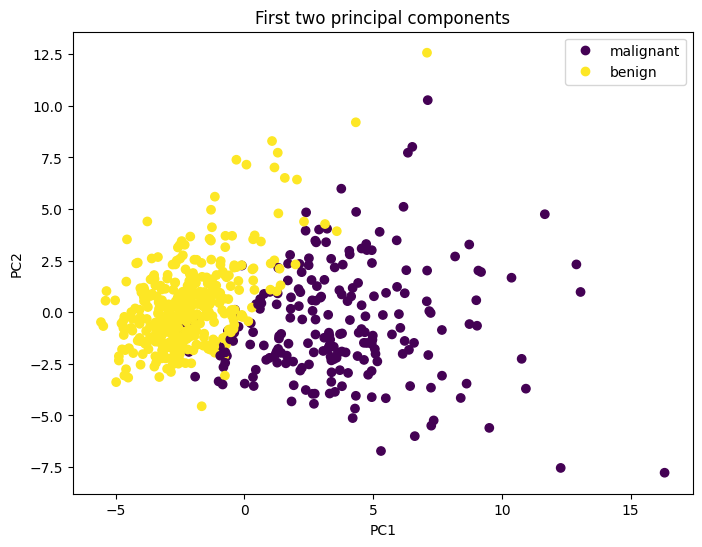

In [108]:
from sklearn.decomposition import PCA
plt.figure(figsize=(8,6))
pca = PCA()
pca.fit(scaled_data)
X = pca.transform(scaled_data)
plot = plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(mydata['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()


In [109]:
#Explained variance shows how much variation in a dataset can be attributed to 
#each of the principal components that were generated by the PCA method. 
print(pca.explained_variance_ratio_)
exp_var = pca.explained_variance_ratio_

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [110]:
print(f"first 3 attributes explain {round(exp_var[:3].sum(),2) * 100} % of total variance of the dataset")
print(X[:, :3].shape)
X = X[:, :3]

first 3 attributes explain 73.0 % of total variance of the dataset
(569, 3)


# Algorithm Selection

**For the breast cancer dataset we used the KFold as an evaluation method.**


Accuracy score is not representative as there is imbalance between the target feature.

For that reason  we need to calculate the recall and the precision metrics.

## LogisticRegression
Logistic regression is a classification technique and it belongs to the group of linear classifiers. Logistic regression is fast and relatively uncomplicated, and the results are easily interpreted.

In [111]:
from sklearn.model_selection import KFold
final_scores={}

KFold=KFold(n_splits=8,random_state=42,shuffle=True)
cost_logreg=[]
cost_recall=[]
cost_precision=[]

for train,test in KFold.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    LR=LogisticRegression()
    LR.fit(X_train,y_train)
    cost_logreg.append(LR.score(X_test,y_test)) #mean accuracy
    y_pred=LR.predict(X_test)
    cost_recall.append(recall_score(y_test,y_pred,pos_label=1))
    cost_precision.append(precision_score(y_test,y_pred,pos_label=1))

#Print the accuracy, recall and the precision. 
score={}
print(np.array(cost_logreg))
print(np.array(cost_recall))
score['accuracy']=np.array(cost_logreg).mean()
score['recall']=np.array(cost_recall).mean()
score['precision']=np.array(cost_precision).mean()
score

#fill the final_score with the LR scores
final_scores['LR']=score
final_scores

[0.98611111 0.97183099 0.94366197 0.95774648 0.92957746 0.95774648
 0.92957746 0.92957746]
[1.         0.97619048 0.96       0.95833333 0.95121951 0.95744681
 0.97222222 0.93478261]


{'LR': {'accuracy': 0.9507286776212833,
  'recall': 0.9637743701434305,
  'precision': 0.9567380372800701}}

In [112]:
cm = confusion_matrix(y_test,y_pred)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

print(cm)
print('Testing Accuracy =',(TP + TN)/(TP + FP + FN + TN))
print()

[[23  2]
 [ 3 43]]
Testing Accuracy = 0.9295774647887324



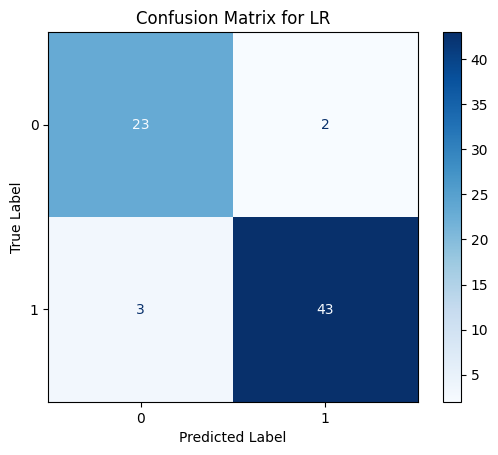

In [113]:
matrix = plot_confusion_matrix(LR, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LR')
plt.xlabel('Predicted Label') 
plt.ylabel('True Label')
plt.show()

# DecisionTreeClassifier
Decision tree classifiers are supervised machine learning models that use labelled data in order to train an algorithm that can be used to make a prediction.



In [114]:
from sklearn.model_selection import KFold

KFold=KFold(n_splits=8,random_state=42,shuffle=True)
cost_DTC=[]
cost_recall=[]
cost_precision=[]

for train,test in KFold.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    DTC=DecisionTreeClassifier(criterion='gini', max_depth=3)
    DTC.fit(X_train,y_train)
    cost_DTC.append(DTC.score(X_test,y_test))
    y_pred=DTC.predict(X_test)
    cost_recall.append(recall_score(y_test,y_pred,pos_label=1))
    cost_precision.append(precision_score(y_test,y_pred,pos_label=1))

#Print the accuracy, recall and the precision. 
score={}
print(np.array(cost_DTC))
print(np.array(cost_recall))
score['accuracy']=np.array(cost_DTC).mean()
score['recall']=np.array(cost_recall).mean()
score['precision']=np.array(cost_precision).mean()
score

#fill the final_score with the DTC scores
final_scores['DTC']=score
final_scores

[0.93055556 0.92957746 0.92957746 0.92957746 0.90140845 0.92957746
 0.92957746 0.94366197]
[0.93617021 0.88095238 0.94       0.91666667 0.87804878 0.95744681
 1.         0.97826087]


{'LR': {'accuracy': 0.9507286776212833,
  'recall': 0.9637743701434305,
  'precision': 0.9567380372800701},
 'DTC': {'accuracy': 0.9279391627543035,
  'recall': 0.9359432148685831,
  'precision': 0.9492375489897547}}

In [115]:
cm = confusion_matrix(y_test,y_pred)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

print(cm)
print('Testing Accuracy =',(TP + TN)/(TP + FP + FN + TN))
print()

[[22  3]
 [ 1 45]]
Testing Accuracy = 0.9436619718309859



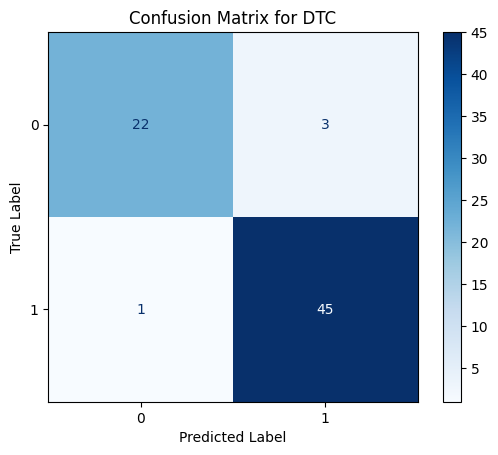

In [116]:
matrix = plot_confusion_matrix(DTC, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for DTC')
plt.xlabel('Predicted Label') 
plt.ylabel('True Label')
plt.show()

# RandomForestClassifier
A random forest classifier fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [117]:
from sklearn.model_selection import KFold

KFold=KFold(n_splits=8,random_state=42,shuffle=True)
RFC=RandomForestClassifier(n_estimators=206,random_state=42,criterion='gini')

cost_RFC=[]
cost_recall=[]
cost_precision=[]

for train,test in KFold.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    RFC.fit(X_train,y_train)
    cost_RFC.append(RFC.score(X_test,y_test))
    y_pred=RFC.predict(X_test)
    cost_recall.append(recall_score(y_test,y_pred,pos_label=1))
    cost_precision.append(precision_score(y_test,y_pred,pos_label=1))

#Print the accuracy, recall and the precision. 
score={}
print(np.array(cost_RFC))
print(np.array(cost_recall))
score['accuracy']=np.array(cost_RFC).mean()
score['recall']=np.array(cost_recall).mean()
score['precision']=np.array(cost_precision).mean()
score

#fill the final_score with the RFC scores
final_scores['RFC']=score
final_scores

[0.94444444 0.94366197 0.94366197 0.94366197 0.95774648 0.95774648
 0.94366197 0.92957746]
[0.95744681 0.92857143 0.96       0.9375     0.97560976 0.95744681
 1.         0.95652174]


{'LR': {'accuracy': 0.9507286776212833,
  'recall': 0.9637743701434305,
  'precision': 0.9567380372800701},
 'DTC': {'accuracy': 0.9279391627543035,
  'recall': 0.9359432148685831,
  'precision': 0.9492375489897547},
 'RFC': {'accuracy': 0.9455203442879498,
  'recall': 0.9591370676025877,
  'precision': 0.9546899640984978}}

In [118]:
cm = confusion_matrix(y_test,y_pred)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

print(cm)
print('Testing Accuracy =',(TP + TN)/(TP + FP + FN + TN))
print()

[[22  3]
 [ 2 44]]
Testing Accuracy = 0.9295774647887324



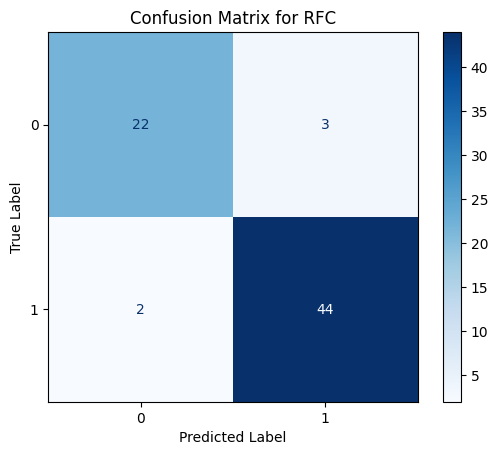

In [119]:
matrix = plot_confusion_matrix(RFC, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for RFC')
plt.xlabel('Predicted Label') 
plt.ylabel('True Label')
plt.show()

In [120]:
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


KFold=KFold(n_splits=8,random_state=42,shuffle=True)
LDA = LDA()

cost_LDA=[]
cost_recall=[]
cost_precision=[]

for train,test in KFold.split(X):
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    LDA.fit(X_train,y_train)
    cost_LDA.append(LDA.score(X_test,y_test))
    y_pred=LDA.predict(X_test)
    cost_recall.append(recall_score(y_test,y_pred,pos_label=1))
    cost_precision.append(precision_score(y_test,y_pred,pos_label=1))

#Print the accuracy, recall and the precision. 
score={}
print(np.array(cost_LDA))
print(np.array(cost_recall))
score['accuracy']=np.array(cost_LDA).mean()
score['recall']=np.array(cost_recall).mean()
score['precision']=np.array(cost_precision).mean()
score

#fill the final_score with the LDA scores
final_scores['LDA']=score
final_scores

[0.93055556 0.97183099 0.91549296 0.94366197 0.94366197 0.97183099
 0.91549296 0.92957746]
[0.9787234 1.        1.        1.        1.        1.        1.
 1.       ]


{'LR': {'accuracy': 0.9507286776212833,
  'recall': 0.9637743701434305,
  'precision': 0.9567380372800701},
 'DTC': {'accuracy': 0.9279391627543035,
  'recall': 0.9359432148685831,
  'precision': 0.9492375489897547},
 'RFC': {'accuracy': 0.9455203442879498,
  'recall': 0.9591370676025877,
  'precision': 0.9546899640984978},
 'LDA': {'accuracy': 0.9402631064162754,
  'recall': 0.9973404255319149,
  'precision': 0.9149847433145752}}

In [121]:
cm = confusion_matrix(y_test,y_pred)

TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

print(cm)
print('Testing Accuracy =',(TP + TN)/(TP + FP + FN + TN))
print()

[[20  5]
 [ 0 46]]
Testing Accuracy = 0.9295774647887324



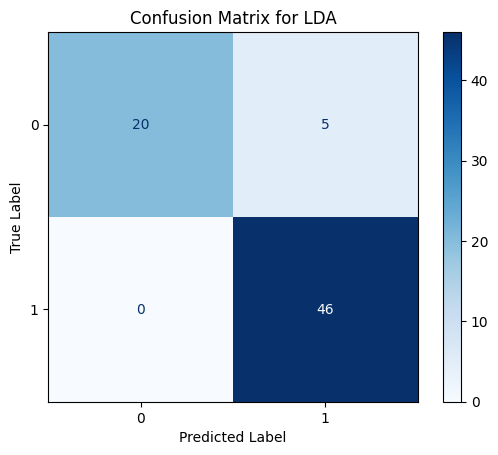

In [122]:
matrix = plot_confusion_matrix(LDA, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LDA')
plt.xlabel('Predicted Label') 
plt.ylabel('True Label')
plt.show()

**Summarizing all the scores in a dataframe**

In [123]:
score_name=pd.DataFrame(final_scores,index=final_scores['LR'].keys(), columns=final_scores.keys())
score_name

,LR,DTC,RFC,LDA
accuracy,0.951,0.928,0.946,0.940
recall,0.964,0.936,0.959,0.997
precision,0.957,0.949,0.955,0.915


<AxesSubplot: >

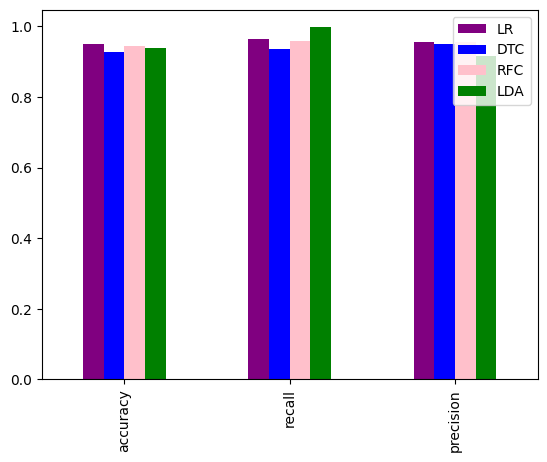

In [124]:
#showing the results
score_name.plot.bar(color=('purple', 'b', 'pink','green'))

# **Conclusion**

Generally, Logistic regression models tend to overfit the data, especially in high dimentional data. On the other hand, LDA is a simple classifier that can handle the overfitting problems and in comparison with the DTC and RFC, we decide to choose this classifier for our dataset.
